# **Прямое кодирование слов**

In [ ]:
# Прямое кодирование на уровне слов (упрощенный пример)

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),
                  max_length,
                  max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:
# Прямое кодирование на уровне символов (упрощенный пример)

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable                                                       #Все отображаемые символы ASCII
token_index = dict(zip(characters, range(1, len(characters) + 1)))                  #Словарь "Символ: индекс"

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [ ]:
# Использование Keras для прямого кодирования слов

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)                                         # Создание индекса всех слов

sequences = tokenizer.texts_to_sequences(samples)                       # Преобразование строк в списки целочисленных индексов

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 9 unique tokens.


In [ ]:
# Прямое кодирование на уровне слов с использованием хеширования (упрощенный пример)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

# **Векторное представление слов**

## Конструирование векторных представлений слов с помощью слоя Embedding


In [ ]:
# . Создание слоя Embedding

from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)     # Слой Embedding принимает как минимум
                                          # два аргумента: количество возможных
                                          # токенов (в данном случае 1000: 1 +
                                          # максимальный индекс слова) и размерность
                                          # пространства (в данном случае 64)

In [ ]:
#  Загрузка данных из IMDB для передачи в слой Embedding

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(
                                            num_words=max_features)  # Загрузка данных как списков целых чисел

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # Преобразование списков целых чисел в двумерный тензор с целыми числами 
                                                                            # и с формой (образцы, максимальная_длина)

x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Использование слоя Embedding и классификатора данных из IMDB

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=32,
 validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6656 - acc: 0.6342 - val_loss: 0.6140 - val_acc: 0.7012
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5370 - acc: 0.7553 - val_loss: 0.5262 - val_acc: 0.7312
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4592 - acc: 0.7890 - val_loss: 0.4989 - val_acc: 0.7462
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4208 - acc: 0.8100 - val_loss: 0.4943 - val_acc: 0.7512
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3941 - acc: 0.8233 - val_loss: 0.4926 - val_acc: 0.7572
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3718 - acc: 0.8349 - val_loss: 0.4945 - val_acc: 0.7588
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3515 - acc: 0.8466 - val_loss: 0.4991 - val_acc: 0.7574
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

##  Объединение всего вместе: от исходного текста к векторному представлению слов

### Загрузка данных из IMDB в виде простого текста

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

imdb_dir = '/content/drive/MyDrive/Datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [7]:
#labels = []
#texts = []
#for label_type in ['neg', 'pos']:
#    dir_name = os.path.join(train_dir, label_type)
#    for fname in os.listdir(dir_name):
#        if fname[-4:] == '.txt':
#            f = open(os.path.join(dir_name, fname))
#            texts.append(f.read())
#            f.close()
#            if label_type == 'neg':
#                labels.append(0)
#            else:
#                labels.append(1)

KeyboardInterrupt: ignored

In [8]:
with open("/content/drive/MyDrive/Datasets/aclImdb/train_texts.txt") as file:
    texts = [line.strip() for line in file.readlines()]

In [10]:
with open("/content/drive/MyDrive/Datasets/aclImdb/train_labels.txt") as file:
    labels = [line.strip() for line in file.readlines()]

In [13]:
print(len(texts))
print(len(labels))

25046
25000


In [14]:
texts =texts[:25000]

In [37]:
labels = [int(lab) for lab in labels]

In [38]:
print(len(texts))
print(len(labels))

25000
25000


In [39]:
# Токенизация текста из исходного набора данных IMDB

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100                      #Отсечение остатка отзывов после 100-го слова
training_samples = 200            #Обучение на выборке из 200 образцов
validation_samples = 10000        #Проверка на выборке из 10 000 образцов
max_words = 10000                 #Рассмотрение только 10 000 наиболее часто используемых слов

tokenizer = Tokenizer(num_words=max_words)            
tokenizer.fit_on_texts(texts)                             #Обучение токенизатора на тексте
sequences = tokenizer.texts_to_sequences(texts)           #Преобразование строк текста в списки целочисленных индексов

word_index = tokenizer.word_index                         #Получение списка индексов предложений в списках
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)            #Преобразование списков в двумерный тензор

labels = np.asarray(labels)                               #Преобразование списка меток в массив numpy
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])                        #Получение индексов предложений в тензоре
np.random.shuffle(indices)                                #Перемешивание индексов отзывов, т.к. в исходном тензоре они упорядочены
data = data[indices]                                      #Упорядочиварие отзывов и меток по новым индексам
labels = labels[indices]

x_train = data[:training_samples]                         #Создание обучающей (200) и валидационной(10000) выборок
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]



Found 88520 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [40]:
x_val = np.array(x_val)
y_val = np.array(y_val)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [24]:
y_train.dtype

dtype('<U1')

### Загрузка векторного представления GloVe

Предварительная обработка векторных представлений

In [17]:
#Обработка файла с векторными представлениями слов GloVe

glove_dir = '/content/drive/MyDrive/Models/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [18]:
#Подготовка матрицы векторных представлений слов GloVe

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))   #Создание нулевой матрицы размерностью 10000 слов на 100 координат вектора в GloVe
for word, i in word_index.items():                        #Проходим по словарю индексов токенизатора
    if i < max_words:
        embedding_vector = embeddings_index.get(word)     #Находим координаты слова из словаря токенизатора в словаре GloVe
        if embedding_vector is not None:                  #Если такой вектор есть (не возвращает None):
            embedding_matrix[i] = embedding_vector        #Заносим координаты вектора слова в строку, соответствующую индексу слова 
                                                          #в словаре токенизатора
                                                      #Словам, отсутствующим в индексе представлений,
                                                      #будут соответствовать векторы с нулевыми значениями

### Определение модели

In [41]:
#  Определение модели

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Загрузка представлений GloVe в модель

In [42]:
# Загрузка предварительно обученных векторных представлений слов в слой Embedding

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### Обучение и оценка модели

In [43]:
# Обучение и оценка

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('/content/drive/MyDrive/Учим нейросети/Франсуа Шолле Глубокое обучение на Python/(6.1)_pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 120ms/step - loss: 0.9541 - acc: 0.4900 - val_loss: 0.6990 - val_acc: 0.4964
Epoch 2/10
7/7 [==============================] - 1s 95ms/step - loss: 0.5943 - acc: 0.7750 - val_loss: 0.7014 - val_acc: 0.4951
Epoch 3/10
7/7 [==============================] - 1s 112ms/step - loss: 0.4682 - acc: 0.8850 - val_loss: 0.8745 - val_acc: 0.4969
Epoch 4/10
7/7 [==============================] - 1s 96ms/step - loss: 0.3688 - acc: 0.8350 - val_loss: 0.7377 - val_acc: 0.4999
Epoch 5/10
7/7 [==============================] - 1s 110ms/step - loss: 0.2282 - acc: 0.9750 - val_loss: 0.7643 - val_acc: 0.4959
Epoch 6/10
7/7 [==============================] - 1s 111ms/step - loss: 0.1423 - acc: 1.0000 - val_loss: 0.7750 - val_acc: 0.4975
Epoch 7/10
7/7 [==============================] - 1s 90ms/step - loss: 0.1001 - acc: 1.0000 - val_loss: 0.7941 - val_acc: 0.4997
Epoch 8/10
7/7 [==============================] - 1s 88ms/step - loss: 0.0680 - acc: 1.0000 -

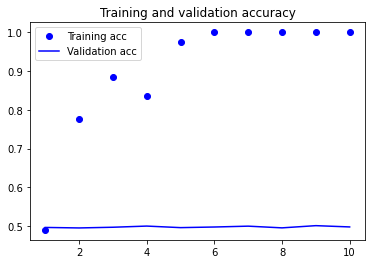

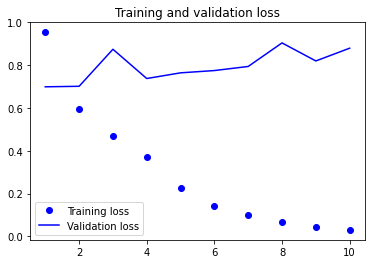

In [44]:
# Вывод результатов

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Модель быстро достигает состояния переобучения, что неудивительно при таком
малом объеме обучающих данных. По этой причине оценка точности демонстрирует высокую изменчивость, но все же достигает уровня 50 %.

Имейте в виду, что ваши результаты могут несколько отличаться от представленных, поскольку при таком небольшом объеме обучающих данных результаты
сильно зависят от того, какие именно 200 образцов попадут в обучающую выборку
при случайном выборе. Если вы получили худший результат, чем мы, попробуйте
ради эксперимента отобрать другой набор из 200 случайных образцов (в реальной
жизни у вас не будет такой возможности).

Эту же модель можно обучить без загрузки предварительно обученных векторных
представлений слов и без замораживания слоя Embedding. В этом случае будет
обучено представление, узкоспециализированное для входного набора токенов.
В такой ситуации обычно получается более мощное представление, чем предварительно обученное, если имеется большой объем обучающих данных. Но в нашем
случае имеется всего 200 обучающих образцов. Тем не менее давайте попробуем
проделать это (рис. 6.7 и 6.8).

In [45]:
# Обучение той же модели без использования уже обученных векторных представлений

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 123ms/step - loss: 0.6976 - acc: 0.4200 - val_loss: 0.6936 - val_acc: 0.4937
Epoch 2/10
7/7 [==============================] - 1s 123ms/step - loss: 0.5844 - acc: 0.9650 - val_loss: 0.6943 

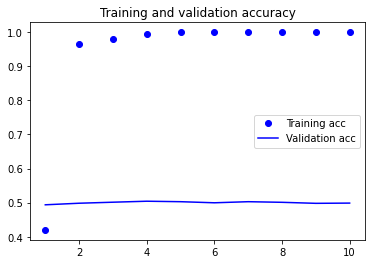

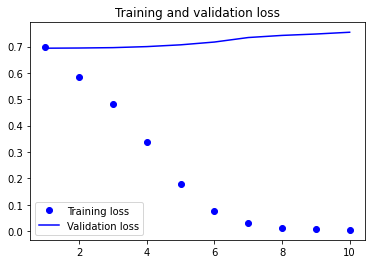

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Точность на этапе проверки замерла на уровне, близком к 50 %. То есть в данном
случае предварительно обученные векторные представления слов выигрывают
у вновь обученных. Если увеличить число обучающих образцов, ситуация быстро
изменится на противоположную, — попробуйте ради эксперимента (сделано ниже).

Наконец, оценим модель на контрольной выборке. Сначала токенизируем контрольные данные.


In [47]:
with open("/content/drive/MyDrive/Datasets/aclImdb/test_texts.txt") as file:
    test_texts = [line.strip() for line in file.readlines()]

In [48]:
with open("/content/drive/MyDrive/Datasets/aclImdb/test_labels.txt") as file:
    test_labels = [line.strip() for line in file.readlines()]

In [49]:
print(len(test_texts))
print(len(test_labels))

25000
25000


In [ ]:
texts =texts[:25000]

In [50]:
test_labels = [int(lab) for lab in labels]

In [ ]:
print(len(texts))
print(len(labels))

25000
25000


In [51]:
# Не включать, долго будет очень. Есть файлы txt с этими списками
#test_dir = os.path.join(imdb_dir, 'test')
#
#test_labels = []
#test_texts = []
#
#for label_type in ['neg', 'pos']:
#    dir_name = os.path.join(test_dir, label_type)
#    for fname in os.listdir(dir_name):
#        if fname[-4:] == '.txt':
#            f = open(os.path.join(dir_name, fname))
#            test_texts.append(f.read())
#            f.close()
#            if label_type == 'neg':
#                test_labels.append(0)
#            else:
#                test_labels.append(1)

test_sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)

А затем загрузим и оценим первую модель.

In [52]:
# Оценка модели на контрольном наборе данных

model.load_weights('/content/drive/MyDrive/Учим нейросети/Франсуа Шолле Глубокое обучение на Python/(6.1)_pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8676 - acc: 0.5043


[0.8675546646118164, 0.5042799711227417]

Мы получили удручающе низкую точность 50 %. Сложно добиться хорошего результата, имея лишь горстку обучающих образцов!

### Оценка модели, обученной с нуля на большой тренировочной выборке

In [55]:
# Увеличим количество обучающих образцов и обучим модель с нуля

training_samples = 20000
validation_samples = 5000


x_train = data[:training_samples]                         #Создание обучающей (10000) и валидационной(10000) выборок
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [56]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 11s 16ms/step - loss: 0.6939 - acc: 0.4990 - val_loss: 0.6935 - val_acc: 0.4870
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5685 - acc: 0.7053 - val_loss:

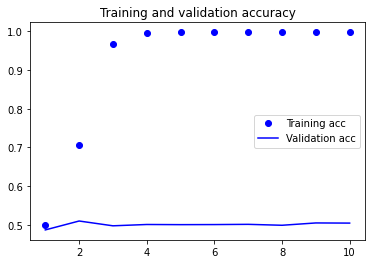

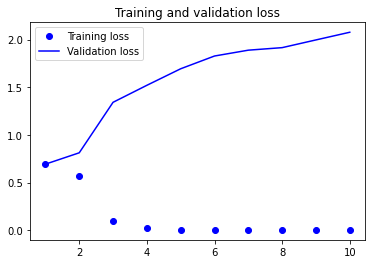

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 2.0866 - acc: 0.5006


[2.0865745544433594, 0.5006399750709534]